<img src='./img/logoline_12000.png' align='center' width='100%'></img>

<br>

# CORDEX: Regional climate projections

### About

This notebook provides you a practical introduction how to calculate seasonal forecast anomalies with data from the [ECMWF SEAS5 model](https://confluence.ecmwf.int/display/CKB/Description+of+SEAS5+C3S+contribution). The workflow shows you how to compute a hindcast climate mean for the climate reference period 1993 to 2016 and this hindcast climate mean is used to compute real-time forecast anomalies. At the end, the the computed anomalies are compared with precomputed seasonal forecast anomalies offered by the Copernicus Climate Data Store.
The example showcases global real-time forecast anomalies for September 2021 and five leadtime months (until February 2022).


The notebook has the following outline:

* [1 - Unzip the downloaded data files](#unzip_cordex)
* [2 - Compute CORDEX historical climatology for reference period 1971-2000](#cordex_historical_climatology)
* [3 - Compute CORDEX future climatology for reference period 2071-2100 based on scenario RCP4.5](#cordex_future_climatology)
* [4 - Compute and visualize the near-surface air temperature difference between reference periods 2071-2100 and 1971-2000](#cordex_visualize_difference)

### Data

This notebook introduces you to `CORDEX regional climate model data` on single levels. The data used in the notebook has the following specifications:

> **Data**: `CORDEX regional climate model data on single levels - Experiment: Historical` <br>
> **Temporal coverage**: `1 Jan 1971 to 31 Dec 2000` <br>
> **Spatial coverage**: `Domain: Africa` <br>
> **Format**: `zip`<br>
> **Retrieve requests**: [CDS API request - CORDEX regional climate model data - Experiment: Historical](./100_climate_data_store_intro.ipynb#cordex_historical)


<br>

> **Data**: `CORDEX regional climate model data on single levels - Experiment: RCP4.5` <br>
> **Temporal coverage**: `1 Jan 2071 to 31 Dec 2100` <br>
> **Spatial coverage**: `Domain: Africa` <br>
> **Format**: `zip`<br>
> **Retrieve requests**: [CDS API request - CORDEX regional climate model data - Experiment: RCP 4.5](./100_climate_data_store_intro.ipynb#cordex_rcp45)

<br>


Get [here](./101_c3s_data_intro.ipynb#climate_projections) more information about climate projectionsin general including an overview of the different climate projections available in the Climate Data Store.

<hr>

### Load libraries

In [15]:
# CDS API
#import cdsapi

# Libraries for working with multidimensional arrays
import numpy as np
import xarray as xr

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

# Libraries for paths and filenames
from glob import glob
from pathlib import Path
from os.path import basename

### Load helper functions

In [29]:
%run ./functions.ipynb

<hr>

## <a id='unzip_cordex'></a>1. Unzip the downloaded data files

In [2]:
import zipfile
with zipfile.ZipFile('./data/cordex_regional_projection/2071-2100_cordex_rcp_4_5_africa.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/cordex_regional_projection/')

In [20]:
import zipfile
with zipfile.ZipFile('./data/cordex_regional_projection/1971-2000_cordex_rcp_4_5_africa.zip', 'r') as zip_ref:
    zip_ref.extractall('./data/cordex_regional_projection/historical/')

<br>

## <a id='cordex_historical_climatology'></a>2. Compute CORDEX historical climatology for reference period 1971-2000

In [9]:
ds_1971_2000_historical = xr.open_mfdataset('./data/cordex_regional_projection/historical/*.nc', concat_dim='time')
ds_1971_2000_historical

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 201, rlon: 194, time: 10950)
Coordinates:
  * time          (time) object 1971-01-01 12:00:00 ... 2000-12-31 12:00:00
  * rlon          (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat          (rlat) float64 -45.76 -45.32 -44.88 ... 41.36 41.8 42.24
    lon           (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    height        float64 2.0
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(1825, 201, 194), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chunksize=(1825, 2), meta=np.ndarray>
Attributes: (12/26)
    title:                          CanRCM4 model output prepared for CORDEX ...
    institution:                    CCCma (Canadian Centre for Climate Modell...
    institute_id:                   CCCma
    contact:                        cccma_info@ec.gc.ca
    Conventions:                    CF-1.4
    experiment:                     Historical run driven by CCCma-CanESM2
    ...                             ...
    history:                        created: 2012-06-29 23:52:08 by rcm2nc
    data_licence:                   1) GRANT OF LICENCE - The Government of C...
    creation_date:                  2012-06-29-T23:47:03Z
    c3s_comment:                    This data has been published at ESGF with...
    tracking_id:                    hdl:21.14103/3d35a8d3-105d-451c-88fa-4d46...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [10]:
tas_1971_2000_historical = ds_1971_2000_historical['tas']
tas_1971_2000_historical



<xarray.DataArray 'tas' (time: 10950, rlat: 201, rlon: 194)>
dask.array<concatenate, shape=(10950, 201, 194), dtype=float32, chunksize=(1825, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1971-01-01 12:00:00 ... 2000-12-31 12:00:00
  * rlon     (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    height   float64 2.0
Attributes:
    long_name:      Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [22]:
tas_1971_2000_climatology = tas_1971_2000_historical.groupby('time.month').mean()
tas_1971_2000_climatology

tas_1971_2000_climatology_degC = tas_1971_2000_climatology - 273.15

<br>

## <a id='cordex_future_climatology'></a>3. Compute CORDEX future climatology for reference period 2071-2100 based on scenario RCP4.5

In [4]:
ds_2071_2100_projection = xr.open_mfdataset('./data/cordex_regional_projection/projection/*.nc', concat_dim='time')
ds_2071_2100_projection

<xarray.Dataset>
Dimensions:       (bnds: 2, rlat: 201, rlon: 194, time: 10950)
Coordinates:
  * time          (time) object 2071-01-01 12:00:00 ... 2100-12-31 12:00:00
  * rlon          (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat          (rlat) float64 -45.76 -45.32 -44.88 ... 41.36 41.8 42.24
    lon           (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat           (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    height        float64 2.0
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b'' b''
    tas           (time, rlat, rlon) float32 dask.array<chunksize=(1825, 201, 194), meta=np.ndarray>
    time_bnds     (time, bnds) object dask.array<chunksize=(1825, 2), meta=np.ndarray>
Attributes: (12/26)
    title:                          CanRCM4 model output prepared for CORDEX ...
    institution:                    CCCma (Canadian Centre for Climate Modell...
    institute_id:                   CCCma
    contact:                        cccma_info@ec.gc.ca
    Conventions:                    CF-1.4
    experiment:                     RCP4.5 run driven by CCCma-CanESM2 
    ...                             ...
    history:                        created: 2012-06-29 23:55:49 by rcm2nc
    data_licence:                   1) GRANT OF LICENCE - The Government of C...
    creation_date:                  2012-06-29-T23:48:22Z
    c3s_comment:                    This data has been published at ESGF with...
    tracking_id:                    hdl:21.14103/7bd05374-ef0d-4b0a-80fc-5e08...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [5]:
tas_2071_2100_projection = ds_2071_2100_projection['tas']
tas_2071_2100_projection

<xarray.DataArray 'tas' (time: 10950, rlat: 201, rlon: 194)>
dask.array<concatenate, shape=(10950, 201, 194), dtype=float32, chunksize=(1825, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 2071-01-01 12:00:00 ... 2100-12-31 12:00:00
  * rlon     (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    lat      (rlat, rlon) float64 dask.array<chunksize=(201, 194), meta=np.ndarray>
    height   float64 2.0
Attributes:
    long_name:      Near-Surface Air Temperature
    standard_name:  air_temperature
    units:          K
    grid_mapping:   rotated_pole
    cell_methods:   time: mean

In [6]:
tas_2071_2100_projection.time

<xarray.DataArray 'time' (time: 10950)>
array([cftime.DatetimeNoLeap(2071, 1, 1, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2071, 1, 2, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2071, 1, 3, 12, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2100, 12, 29, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 30, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2100, 12, 31, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2071-01-01 12:00:00 ... 2100-12-31 12:00:00
    height   float64 2.0
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T
    bounds:         time_bnds

In [21]:

tas_2071_2100_climatology = tas_2071_2100_projection.groupby('time.month').mean()
tas_2071_2100_climatology

tas_2071_2100_climatology_degC = tas_2071_2100_climatology - 273.15

<br>

## <a id='cordex_visualize_difference'></a>4. Compute and visualize the near-surface air temperature difference between reference periods 2071-2100 and 1971-2000

In [23]:
diff = tas_2071_2100_climatology - tas_1971_2000_climatology
diff

<xarray.DataArray 'tas' (month: 12, rlat: 201, rlon: 194)>
dask.array<sub, shape=(12, 201, 194), dtype=float32, chunksize=(1, 201, 194), chunktype=numpy.ndarray>
Coordinates:
  * rlon     (rlon) float64 -24.64 -24.2 -23.76 -23.32 ... 59.4 59.84 60.28
  * rlat     (rlat) float64 -45.76 -45.32 -44.88 -44.44 ... 41.36 41.8 42.24
    lon      (rlat, rlon) float64 335.4 335.8 336.2 336.7 ... 59.4 59.84 60.28
    lat      (rlat, rlon) float64 -45.76 -45.76 -45.76 ... 42.24 42.24 42.24
    height   float64 2.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'CORDEX near surface air temperature difference'}>)

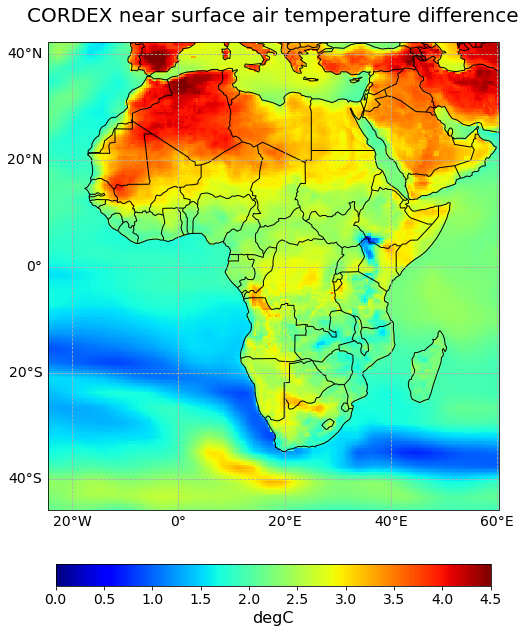

In [36]:
visualize_pcolormesh(data_array = diff[5,:,:], 
                     longitude = diff.rlon, 
                     latitude = diff.rlat, 
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'jet', 
                     unit = 'degC', 
                     long_name = 'CORDEX near surface air temperature difference', 
                     vmin = 0, 
                     vmax = 4.5, 
                     set_global = False, 
                     lonmin = diff.rlon.min(), 
                     lonmax = diff.rlon.max(), 
                     latmin = diff.rlat.min(), 
                     latmax = diff.rlat.max())

<br>

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'CORDEX near surface air temperature difference'}>)

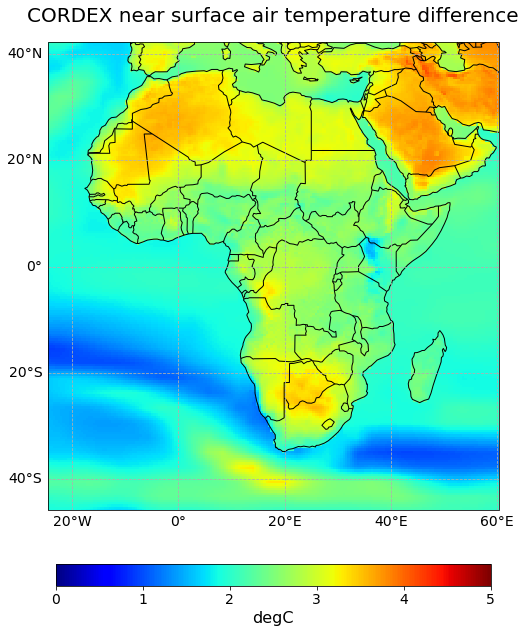

In [44]:
visualize_pcolormesh(data_array = diff.mean('month'), 
                     longitude = diff.rlon, 
                     latitude = diff.rlat, 
                     projection = ccrs.PlateCarree(), 
                     color_scale = 'jet', 
                     unit = 'degC', 
                     long_name = 'CORDEX near surface air temperature difference', 
                     vmin = 0, 
                     vmax = 5, 
                     set_global = False, 
                     lonmin = diff.rlon.min(), 
                     lonmax = diff.rlon.max(), 
                     latmin = diff.rlat.min(), 
                     latmax = diff.rlat.max())

<br>

<hr>

<p><img src='./img/copernicus_logo.png' align='right' alt='Logo EU Copernicus' width='20%'></img></p>
<br><br><br><br><br>
<span style='float:right'><p style=\"text-align:right;\">This project is licensed under <a href="./LICENSE">APACHE License 2.0</a>. | <a href=\"https://github.com/ecmwf-projects/copernicus-training">View on GitHub</a></span>